In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [2]:
url="pca_iris.data"

In [3]:
# datasetimizi Pandas DataFrame içine yüklüyoruz..

df = pd.read_csv(url, names=["sepal_lenght", "sepal_width","petal_lenght","petal_width", "target"])
df

,sepal_lenght,sepal_width,petal_lenght,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [1]:
features=["sepal_lenght","sepal_width","petal_lenght","petal_width"]

# feature'ları x olarak ayırıyoruz
x= df[features]

# target'i y olarak ayırıyoruz
y= df[["target"]]

NameError: name 'df' is not defined

In [5]:
# özellikleri standardize ediyoruz
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [6]:
# PCA Projection ile verileri 4 boyuttan - 2 boyuta düşürüyoruz
pca = PCA(n_components= 2)
principalComponent= pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponent, columns=["Principal Component1", "Principal Component2"])

principalDf

,Principal Component1,Principal Component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [7]:
# target sütunumuzu da PCA dataframe'imizin sonuna ekleyelim
finalDataFrame = pd.concat([principalDf, df[["target"]]], axis=1)
finalDataFrame

,Principal Component1,Principal Component2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [10]:
dfsetosa = finalDataFrame[finalDataFrame["target"]=="Iris-setosa"]

In [11]:
dfvirginica = finalDataFrame[finalDataFrame.target=="Iris-virginica"]

In [12]:
dfversicolor = finalDataFrame[finalDataFrame.target=="Iris-versicolor"]

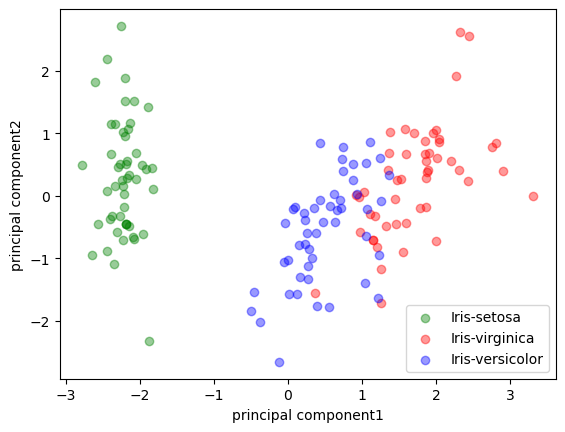

In [14]:
plt.xlabel('principal component1')
plt.ylabel("principal component2")
plt.scatter(dfsetosa["Principal Component1"], dfsetosa["Principal Component2"],color="green", label="Iris-setosa", alpha=0.4)
plt.scatter(dfvirginica["Principal Component1"], dfvirginica["Principal Component2"], color="red", label="Iris-virginica",alpha=0.4 )
plt.scatter(dfversicolor["Principal Component1"], dfversicolor["Principal Component2"], color="blue", label="Iris-versicolor",alpha=0.4)
plt.legend()
plt.show()

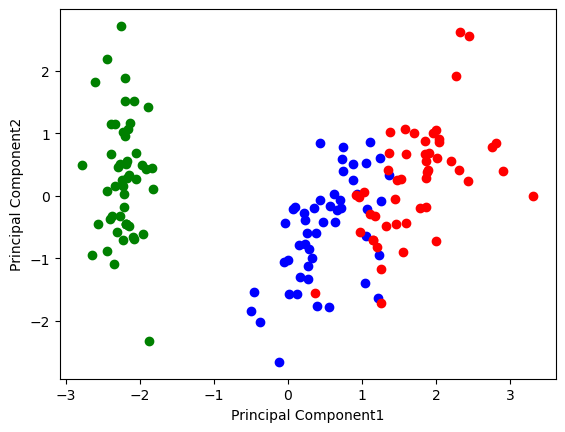

In [20]:
# daha profesyonel görselleştirme 

targets = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors = ["g","b","r"]

plt.xlabel("Principal Component1")
plt.ylabel("Principal Component2")

for target, col in zip(targets,colors):
    dftemp= finalDataFrame[df.target==target]
    plt.scatter(dftemp["Principal Component1"],dftemp["Principal Component2"], color=col)


In [21]:
pca.explained_variance_ratio_


array([0.72770452, 0.23030523])

In [22]:
pca.explained_variance_ratio_.sum()

0.9580097536148199